### Exercise 2. Implement a class $DiGraph$ of directed graphs:
(i) Define basic operations for the insertion and deletion of edges and the determination of outgoing/incoming edges.

(ii) Implement depth-first and breadth-first search on directed graphs.

(iii) Implement an opertation that checks, if a given directed graph is acyclic.

**Note: We format our edges here.
Assume input edge format - (incoming vertex, outgoing vertex)**

In [9]:
# you can install this package on your own environment to help understand
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
# (i) Modified DiGraph class from Graph Class
class DiGraph:
    def __init__(self,edges=[]):
        self.vertexList = VertexList(edges)
        for e in edges:
            self.addEdge(e)
            ## Modification
            # for directed graph, we only need to store one direction - (in, out)
            # self.addEdge((e[1],e[0])) 
    def addEdge(self,edge):
        # locate the related vertex according to the edge given
        vertex = self.vertexList.locate(edge[0]) # edge[0] is the incoming vertex
        edgelist = vertex.edges # get the edgelist object for this incoming vertex
        if edgelist != None:
            # add outcoming vertex to the edgelist
            edgelist.add(edge[1])
        else:
            # construct a new Edgelist object if this vertex has no edgelist yet
            edgelist = EdgeList(edge[1])
        vertex.setEdges(edgelist)
    def __iter__(self):
        vertices = self.vertexList
        for v in vertices:
            x = vertices.locate(v)
            y = x.edges
            if y != None:
                for z in y:
                    yield (v,z)
    def insertVertex(self,item):
        if not (item in self.vertexList):
            self.vertexList.append(item)
    def deleteVertex(self,item):
        return self.vertexList.remove(item)
    def insertEdge(self,edge):
        self.vertexList.addVertex(edge)
        self.addEdge(edge)
        ## Modification, only one direction now
        # self.addEdge((edge[1],edge[0]))
    def deleteEdge(self,edge):
        self.__deleteEdge(edge)
        ## Modification, only one direction now
        # self.__deleteEdge((edge[1],edge[0]))
    def __deleteEdge(self,edge):
        if not (edge[0] in self.vertexList):
            print("There is no edge", edge)
            return False
        vertexlocation = self.vertexList.locate(edge[0])
        edgelist = vertexlocation.getEdges()
        if edgelist == None:
            print("There is no edge", edge)
            return False
        res = edgelist.remove(edge[1])
        if res == False:
            print("There is no edge", edge)
        return res
    def outgoingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        edgelist = vertex.getEdges()
        if edgelist == None:
            return []
        res = []
        for v in edgelist:
            res.append((item,v))
        return res
            # yield (item,v) # If we replace the above two lines with this line, then this methods works as an iterator.

# Definition of VertexList Class, a linked list
class VertexList:
    class  __Vertex:
        def __init__(self,item,next=None,previous=None):
            self.item=item # the vertex content
            self.next=next
            self.previous=previous
            self.edges=None # vertices related to this vertex
        def getItem(self):
            return self.item
        def getNext(self):
            return self.next
        def getPrevious(self):
            return self.previous
        def getEdges(self):
            return self.edges
        def setItem(self,item):
            self.item = item
        def setNext(self,next):
            self.next = next
        def setPrevious(self,previous):
            self.previous = previous
        def setEdges(self,edge):
            self.edges = edge
    
    def __init__(self,edges=[]):
        self.dummy = VertexList.__Vertex(None,None,None)
        self.numVertices = 0
        self.dummy.setNext(self.dummy)
        self.dummy.setPrevious(self.dummy)
        for e in edges:
            self.addVertex(e)
    def __iter__(self):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            yield cursor.getItem()
    def append(self,item):
        lastVertex = self.dummy.getPrevious()
        newVertex = VertexList.__Vertex(item,self.dummy,lastVertex)
        lastVertex.setNext(newVertex)
        self.dummy.setPrevious(newVertex)
        self.numVertices += 1
    def __contains__(self,item):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            vertex = cursor.getItem()
            if vertex == item:
                return True
        return False
    # locate the vertex location using its vertex value
    def locate(self,vertex): 
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            item = cursor.getItem()
            if vertex == item:
                return cursor
    # add new vertex if possible for the new edge
    def addVertex(self,edge):
        node1 = edge[0]
        node2 = edge[1]
        if not (node1 in self):
            self.append(node1)
        if not (node2 in self):
            self.append(node2)
    # remove a vertex
    def remove(self,item):
        cursor = self.dummy
        location = None
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            vertex = cursor.getItem()
            edgelist = cursor.edges
            if edgelist != None:
                
                if item in edgelist:
                    print(item, "cannot be deleted, as it appears in an edge.")
                    return False
            if vertex == item:
                location = cursor
        if location == None:
            print(item, "is not a vertex.")
            return False
        nextVertex = location.getNext()
        prevVertex = location.getPrevious()
        prevVertex.setNext(nextVertex)
        nextVertex.setPrevious(prevVertex)
        self.numVertices -= 1
        return True
    def index(self,item):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            if cursor.getItem() == item:
                return i
        return -1
    def getlength(self):
        return self.numVertices
    
# Definition of EdgeList Class, also a linked list
class EdgeList:
    class __Edge:
        def __init__(self,item,next=None,previous=None):
            self.item=item
            self.next=next
            self.previous=previous
        def getItem(self):
            return self.item
        def getNext(self):
            return self.next
        def getPrevious(self):
            return self.previous
        def setItem(self,item):
            self.item = item
        def setNext(self,next):
            self.next = next
        def setPrevious(self,previous):
            self.previous = previous
    
    def __init__(self,edge):
        self.first = EdgeList.__Edge(edge,None,None)
        self.first.setNext(self.first)
        self.first.setPrevious(self.first)
        self.numEdges = 1
    def add(self,edge):
        lastEdge = self.first.getPrevious()
        newEdge = EdgeList.__Edge(edge,self.first,lastEdge)
        lastEdge.setNext(newEdge)
        self.first.setPrevious(newEdge)
        self.numEdges += 1
    def __iter__(self):
        cursor = self.first
        for i in range(self.numEdges):
            yield cursor.getItem()
            cursor = cursor.getNext()
    def __contains__(self,item):
        cursor = self.first
        for i in range(self.numEdges):
            vertex = cursor.getItem()
            if vertex == item:
                return True
            cursor = cursor.getNext()
        return False
    def remove(self,item):
        cursor = self.first
        for i in range(self.numEdges):
            vertex = cursor.getItem()
            if vertex == item:
                nextVertex = cursor.getNext()
                prevVertex = cursor.getPrevious()
                prevVertex.setNext(nextVertex)
                nextVertex.setPrevious(prevVertex)
                self.numEdges -= 1
                if (cursor == self.first):
                    self.first = nextVertex
                return True
            cursor = cursor.getNext()
        return False

    
    



In [11]:
# Ex2.(i)
g = DiGraph([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print([item for item in g])
print(g.outgoingEdges(1))
print(g.outgoingEdges(2))
print([v for v in g.vertexList])
g.insertVertex(7)
g.insertVertex(8)
print([v for v in g.vertexList])
g.deleteVertex(1)
g.deleteVertex(7)
print([v for v in g.vertexList])
print([e for e in g])
g.insertEdge((1,7))
print([e for e in g])
g.deleteEdge((1,2))
print([e for e in g])

[(1, 2), (1, 5), (2, 4), (2, 5), (3, 5), (3, 4), (3, 1), (6, 2), (6, 3)]
[(1, 2), (1, 5)]
[(2, 4), (2, 5)]
[1, 2, 4, 3, 5, 6]
[1, 2, 4, 3, 5, 6, 7, 8]
1 cannot be deleted, as it appears in an edge.
[1, 2, 4, 3, 5, 6, 8]
[(1, 2), (1, 5), (2, 4), (2, 5), (3, 5), (3, 4), (3, 1), (6, 2), (6, 3)]
[(1, 2), (1, 5), (1, 7), (2, 4), (2, 5), (3, 5), (3, 4), (3, 1), (6, 2), (6, 3)]
[(1, 5), (1, 7), (2, 4), (2, 5), (3, 5), (3, 4), (3, 1), (6, 2), (6, 3)]


In [12]:
# (ii) other data structures pasted here and also BFS/ DFS
class DiGraph:
    def __init__(self,edges=[]):
        self.vertexList = VertexList(edges)
        for e in edges:
            self.addEdge(e)
            ## Modification
            # for directed graph, we only need to store one direction - (in, out)
            # self.addEdge((e[1],e[0])) 
    def addEdge(self,edge):
        # locate the related vertex according to the edge given
        vertex = self.vertexList.locate(edge[0]) # edge[0] is the incoming vertex
        edgelist = vertex.edges # get the edgelist object for this incoming vertex
        if edgelist != None:
            # add outcoming vertex to the edgelist
            edgelist.add(edge[1])
        else:
            # construct a new Edgelist object if this vertex has no edgelist yet
            edgelist = EdgeList(edge[1])
        vertex.setEdges(edgelist)
    def __iter__(self):
        vertices = self.vertexList
        for v in vertices:
            x = vertices.locate(v)
            y = x.edges
            if y != None:
                for z in y:
                    yield (v,z)
    def insertVertex(self,item):
        if not (item in self.vertexList):
            self.vertexList.append(item)
    def deleteVertex(self,item):
        return self.vertexList.remove(item)
    def insertEdge(self,edge):
        self.vertexList.addVertex(edge)
        self.addEdge(edge)
        ## Modification, only one direction now
        # self.addEdge((edge[1],edge[0]))
    def deleteEdge(self,edge):
        self.__deleteEdge(edge)
        ## Modification, only one direction now
        # self.__deleteEdge((edge[1],edge[0]))
    def __deleteEdge(self,edge):
        if not (edge[0] in self.vertexList):
            print("There is no edge", edge)
            return False
        vertexlocation = self.vertexList.locate(edge[0])
        edgelist = vertexlocation.getEdges()
        if edgelist == None:
            print("There is no edge", edge)
            return False
        res = edgelist.remove(edge[1])
        if res == False:
            print("There is no edge", edge)
        return res
    def outgoingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        edgelist = vertex.getEdges()
        if edgelist == None:
            return []
        res = []
        for v in edgelist:
            res.append((item,v))
        return res
    def bfs(self,vertex):
        if not (vertex in self.vertexList):
            print("There is no vertex", vertex)
            return None
        length = self.vertexList.getlength()
        distance = [None] * length
        parent = [None] * length
        index = self.vertexList.index(vertex)
        distance[index] = 0
        parent[index] = vertex
        currentlayer = Fifo(length)
        currentlayer.pushback(vertex)
        nextlayer = Fifo(length)
        for l in range(length):
            for u in currentlayer:
                print(u)
                loc = self.vertexList.locate(u)
                edgelist = loc.getEdges()
                if edgelist != None:
                    for v in edgelist:
                        idx = self.vertexList.index(v)
                        if parent[idx] == None:
                            nextlayer.pushback(v)
                            distance[idx] = l + 1
                            parent[idx] = u
            currentlayer = nextlayer
            nextlayer = Fifo(length)
        return (distance,parent)

    #DFS traverse using recursion
    def allDFS(self):
        numVertices = self.vertexList.getlength()
        initlist = [None]* numVertices
        self.tree = PyList(initlist,numVertices)
        for i in range(numVertices):
            newgraph = DiGraph([])
            self.tree[i] = newgraph
        for s in self.vertexList:
            self.mark = [None] * numVertices
            self.dfsPos = 1
            self.dfsNum = [1] * numVertices
            self.finishingTime = 1
            self.finishTime = [1] * numVertices
            idx = self.vertexList.index(s)
            if self.mark[idx] == None:
                self.mark[idx] = s
                self.dfsNum[idx] = self.dfsPos
                self.dfsPos += 1
                self.dfs(s,idx)
    def dfs(self,vertex,index):
        for e in self.outgoingEdges(vertex):
            idx = self.vertexList.index(e[1])
            if self.mark[idx] == None:
                self.tree[index].insertEdge(e)
                self.__traverseTreeEdge(e)
                self.mark[idx] = e[1]
                self.dfs(e[1],index)
        self.backtrack(vertex)
    def __traverseTreeEdge(self,e):
        idx = self.vertexList.index(e[1])
        self.dfsNum[idx] = self.dfsPos
        self.dfsPos += 1
    def backtrack(self,vertex):
        idx = self.vertexList.index(vertex)
        self.finishTime[idx] = self.finishingTime
        self.finishingTime += 1
    
# Definition of PyList class
class PyList:
    def __init__(self,contents=[],size=20):
        self.items = [None] * size
        self.numItems = 0
        self.size = size
        for e in contents:
            self.append(e)
    def __setitem__(self,index,val):
        if index >= 0 and index < self.numItems:
            self.items[index] = val
            return
        raise IndexError("PyList assignment index out of range")
    def __getitem__(self,index):
        if index >= 0 and index < self.numItems:
            return self.items[index]
        raise IndexError("PyList index out of range")
    def append(self,item):
        if self.numItems == self.size:
            self.allocate()
        self.items[self.numItems] = item
        self.numItems += 1
    def allocate(self):
        newlength = 2 * self.size
        newList = [None] * newlength
        for i in range(self.numItems):
            newList[i] = self.items[i]
        self.items = newList
        self.size = newlength
    def insert(self,i,x):
        if self.numItems == self.size:
            self.allocate()
        if i < self.numItems:
            for j in range(self.numItems-1,i,-1):
                self.items[j+1] = self.items[j]
            self.items[i] = x
            self.numItems += 1
        else:
            self.append(x)
    def __add__(self,other):
        result = PyList(size=self.numItems+other.numItems)
        for i in range(self.numItems):
            result.append(self.items[i])
        for i in range(other.numItems):
            result.append(other.items[i])
        return result
    def delete(self,index):
        if self.numItems == self.size / 4:
            self.deallocate()
        if index <= self.numItems:
            for j in range(index,self.numItems-2):
                self.items[j] = self.items[j+1]
            self.numItems -= 1
        else:
            raise IndexError("PyList index out of range")
    def deallocate(self):
        newlength = self.size / 2
        newList = [None] * newlength
        for i in range(self.numItems):
            newList[i] = self.items[i]
        self.items = newList
        self.size = newlength
    def __contains__(self,item):
        for i in range(self.numItems):
            if self.items[i] == item:
                return True
            return False
    def __eq__(self,other):
        if type(other) != type(self):
            return False
        if self.numItems != other.numItems:
            return False
        for i in range(self.numItems):
            if self.items[i] != self.items[i]:
                return False
            return True
    def qsort(self):
        if self.numItems <= 1:
            return self
        pivot = self.items[0]
        list1 = PyList([],self.numItems)
        listp = PyList([],self.numItems)
        list2 = PyList([],self.numItems)
        for i in range(self.numItems):
            if self.items[i] < pivot:
                list1.append(self.items[i])
            else:
                if self.items[i] == pivot:
                    listp.append(self.items[i])
                else:
                    list2.append(self.items[i])
        slist1 = list1.qsort()
        slist2 = list2.qsort()
        outlist = slist1 + listp + slist2
        return outlist
    def radixSort(self,numdigits,digits):
        sortedlist = self
        for i in range(numdigits):
            sortedlist = sortedlist.Ksort(i,digits)
        return sortedlist          
    def Ksort(self,round,digits):
        bucket = PyList([],digits)
        for k in range(digits):
            newlist = PyList([],self.numItems)
            bucket.append(newlist)
        for i in range(self.numItems):
            item = self.items[i]
            item1 = item // (digits ** round) % digits
            bucket[item1].append(item)
        result = bucket[0]
        for k in range(digits-1):
            result = result + bucket[k+1]
        return result

# Definition of FIFO class
class Fifo:
    def __init__(self,size=20):
        self.items = [None] * size
        self.first = 0
        self.last = -1
        self.size = size
        self.length = 0
    def computelength(self):
        if self.last >= self.first:
            self.length = self.last - self.first + 1
        else:
            self.length = self.last - self.first + 1 + self.size
    def isEmpty(self):
        if self.length != 0:
            return False
        return True
    def front(self):
        if self.length != 0:
            return self.items[self.last]
        raise Error("Queue is empty")
    def back(self):
        if self.length != 0:
            return self.items[self.first]
        raise Error("Queue is empty")
    def pushback(self,item):
        if self.length == self.size:
            self.allocate()
        self.last = (self.last + 1) % self.size
        self.items[self.last] = item
        self.computelength()
    def popfront(self):
        if self.length == self.size / 4:
            self.deallocate()
        if self.last - self.first + 1 != 0:
            frontelement = self.items[self.last]
            self.first = (self.first + 1) % self.size
            self.computelength()
            return frontelement
        raise Error("Queue is empty")
    def __iter__(self):
        rlast = self.first + self.length
        for i in range(self.first,rlast):
            yield self.items[i % self.size]
    def allocate(self):
        newlength = 2 * self.size
        newQueue = [None] * newlength
        for i in range(self.size):
            pos = (i + self.first) % self.size
            newQueue[i] = self.items[pos]
        self.items = newQueue
        self.first = 0
        self.last = self.size - 1
        self.size = newlength
        self.computelength()
    def deallocate(self):
        newlength = self.size / 2
        newQueue = [None] * newlength
        length = (self.last - self.first +1) % self.size
        for i in range(length):
            pos = (i + self.first) % self.size
            newQueue[i] = self.items[pos]
        self.items = newQueue
        self.first = 0
        self.last = length - 1
        self.size = newlength
        self.computelength()

# Definition of Stack class
class Stack:
    def __init__(self,size=20):
        self.items = [None] * size
        self.numItems = 0
        self.size = size
        
    def top(self):
        if self.numItems != 0:
            return self.items[self.numItems-1]
        raise Error("Stack is empty")
        
    def push(self,item):
        if self.numItems == self.size:
            self.allocate()
        self.items[self.numItems] = item
        self.numItems += 1
        
    def allocate(self):
        newlength = 2 * self.size
        newStack = [None] * newlength
        for i in range(self.numItems):
            newStack[i] = self.items[i]
        self.items = newStack
        self.size = newlength
        
    def pop(self):
        if self.numItems == self.size / 4:
            self.deallocate()
        if self.numItems != 0:
            topelement = self.items[self.numItems-1]
            self.numItems -= 1
            return topelement
        raise Error("Stack is empty")
        
    def deallocate(self):
        newlength = self.size // 2
        newStack = [None] * newlength
        for i in range(self.numItems):
            newStack[i] = self.items[i]
        self.items = newStack
        self.size = newlength
        
    def isEmpty(self):
        if self.numItems != 0:
            return False
        return True

In [22]:
# Ex2.(ii)
g = DiGraph([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
g.bfs(1)

1
2
5
4


([0, 1, 2, None, 1, None], [1, 1, 2, None, 1, None])

In [23]:
g.allDFS()
for s in g.vertexList:
    idx = g.vertexList.index(s)
    print(s)
    for e in g.tree[idx]:
        print(e)

1
(1, 2)
(2, 4)
(2, 5)
2
(2, 4)
(2, 5)
4
3
(3, 5)
(3, 4)
(3, 1)
(1, 2)
5
6
(6, 2)
(6, 3)
(2, 4)
(2, 5)
(3, 1)


Print all vertices：[1, 2, 3, 4, 5, 6]
Print all edges：[(1, 2), (1, 5), (2, 4), (2, 5), (3, 5), (3, 4), (3, 1), (6, 2), (6, 3)]
Print the number of edges：9


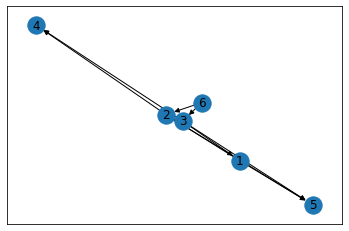

In [14]:
# visualization
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print("Print all vertices：{}".format(G.nodes()))
print("Print all edges：{}".format(G.edges()))
print("Print the number of edges：{}".format(G.number_of_edges()))
nx.draw_networkx(G)
plt.show()

#### Directed acyclic graph (DAG)
In mathematics, particularly graph theory, and computer science, a directed acyclic graph is a **finite directed graph with no directed cycles**. That is, it consists of finitely many vertices and edges (also called arcs), with each edge directed from one vertex to another, such that there is no way to start at any vertex v and follow a consistently-directed sequence of edges that eventually loops back to v again. Equivalently, a DAG is a directed graph that has a topological ordering, a sequence of the vertices such that every edge is directed from earlier to later in the sequence.

[For your reference](https://www.geeksforgeeks.org/detect-cycle-in-a-graph/)

**Hint: Think about how to check whether there is a cycle in a directed graph.**

**A cycle means we can go back to the starting vertex after traversing several vertices.**

In [15]:
# define a new function, assume we will put in a directed graph defined above.
# similar to DFS, but we need to check something else
def isAcyclic(graph):
    length = graph.vertexList.getlength()
    v_lst = graph.vertexList
    for vertex in v_lst:
        parent = [None] * length
        visited = [] # store the visited node here to check whether there is a cycle
        index = graph.vertexList.index(vertex)
        parent[index] = vertex
        S = Stack(length)
        S.push(vertex)
        while(not S.isEmpty()):
            u = S.pop()
            u_idx = graph.vertexList.index(u)
            loc = graph.vertexList.locate(u)
            edgelist = loc.getEdges()
            if (edgelist != None):
                visited.append(u)
                for v in edgelist:
                    if(v in visited):
                        print(visited+[v], vertex) # print out the cycle
                        return False
                    idx = graph.vertexList.index(v)
                    if parent[idx] == None:
                        S.push(v)
                        parent[idx] = u

    return True

In [16]:
def isAcyclic_2(graph):
    graph.allDFS()
    finishingTime = graph.finishTime
    for e in graph:
        v_in = graph.vertexList.index(e[0])
        v_out = graph.vertexList.index(e[1])
        if(finishingTime[v_in] < finishingTime[v_out]):
            print(e, finishingTime[v_in], finishingTime[v_out])
            return False
    
    return True
    
    

In [17]:
## Test for Ex2 (iii), using first method
g = DiGraph([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print(isAcyclic(g))
g.insertEdge((4,6)) # should have cycle now 1->2->4->6->2
print(isAcyclic(g))

True
[1, 2, 4, 6, 2] 1
False


In [18]:
## Test for Ex2 (iii), using second method
g = DiGraph([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print(isAcyclic_2(g))
g.insertEdge((4,6)) # should have cycle now 1->2->4->6->2
print(isAcyclic_2(g))

True
(4, 6) 1 6
False


Print all vertices：[1, 2, 4, 3, 5, 6]
Print all edges：[(1, 2), (1, 5), (2, 4), (2, 5), (4, 6), (3, 5), (3, 4), (3, 1), (6, 2), (6, 3)]
Print the number of edges：10


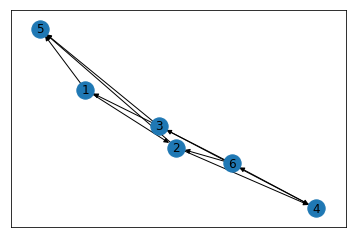

In [92]:
# visualization
G = nx.DiGraph()
G.add_edges_from([(1,2),(2,4),(3,5),(4,6),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print("Print all vertices：{}".format(G.nodes()))
print("Print all edges：{}".format(G.edges()))
print("Print the number of edges：{}".format(G.number_of_edges()))
nx.draw_networkx(G)
plt.show()